In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [3]:
t1 = tf.Variable([1, 2, 3], dtype=tf.float32) # 만약 상수라면 상수에 대해서는 편미분을 할 필요가 없으므로 none이 나온다
t2 = tf.Variable([10, 20, 30], dtype=tf.float32)

with tf.GradientTape() as tape:
    t3 = t1 * t2

gradients = tape.gradient(t3, [t1, t2])
print(gradients[0])
print(gradients[1])

Metal device set to: Apple M1
tf.Tensor([10. 20. 30.], shape=(3,), dtype=float32)
tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


2022-05-10 17:01:40.766333: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-10 17:01:40.766765: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# GradientTape를 이용해서 linear regression 구현하기

x_data = tf.random.normal(shape=(1000,))
y_data = 3*x_data + 1

w = tf.Variable(-1.)
b = tf.Variable(-1.)

LR = 0.01
EP = 10

w_trace, b_trace = [], []
for i in range(EP):
    for x, y in zip(x_data, y_data):
        with tf.GradientTape() as tape:
            h = w*x + b
            loss = tf.reduce_mean(tf.square(y-h))
        gradients = tape.gradient(loss, [w, b])
        w_trace.append(w.numpy())
        b_trace.append(b.numpy())
        w = tf.Variable(w - LR * gradients[0]);
        b = tf.Variable(b - LR * gradients[1]);

print("end")


tf.Tensor(
[-6.51511669e-01  1.17533481e+00  1.18827212e+00 -1.30143285e+00
  1.06788325e+00 -1.59445429e+00  5.21265686e-01  1.60264924e-01
  8.84750545e-01 -1.17674414e-02 -2.22508478e+00  2.68390393e+00
  6.83638096e-01 -7.71747231e-01  4.43465775e-03  1.11394727e+00
 -1.38421595e+00  5.58008790e-01 -1.00088155e+00  4.51391071e-01
 -2.87260205e-01  8.89225185e-01  6.05822146e-01  5.62624514e-01
 -1.91922975e+00 -6.34409428e-01  1.00899231e+00  5.08960605e-01
  2.90047467e-01 -1.19343126e+00 -3.43101770e-01  1.15080178e+00
 -1.49849761e+00  6.93398118e-01  7.03992724e-01 -5.65591037e-01
 -1.16662693e+00  1.95781231e+00 -1.39733589e+00  6.54188395e-01
 -6.26376033e-01  4.13305342e-01  3.27887326e-01  5.87672353e-01
  9.31146562e-01  9.02160585e-01 -1.82850862e+00 -9.49318767e-01
  4.94596601e-01  4.49539661e-01  1.15780520e+00  2.74892092e-01
  2.58897483e-01  1.06679702e+00 -8.09608340e-01 -3.61259133e-02
 -4.27669257e-01 -5.15171252e-02  1.98783720e+00 -9.23233628e-01
 -1.02586854e+

end


<bound method _AxesBase.grid of <AxesSubplot:>>

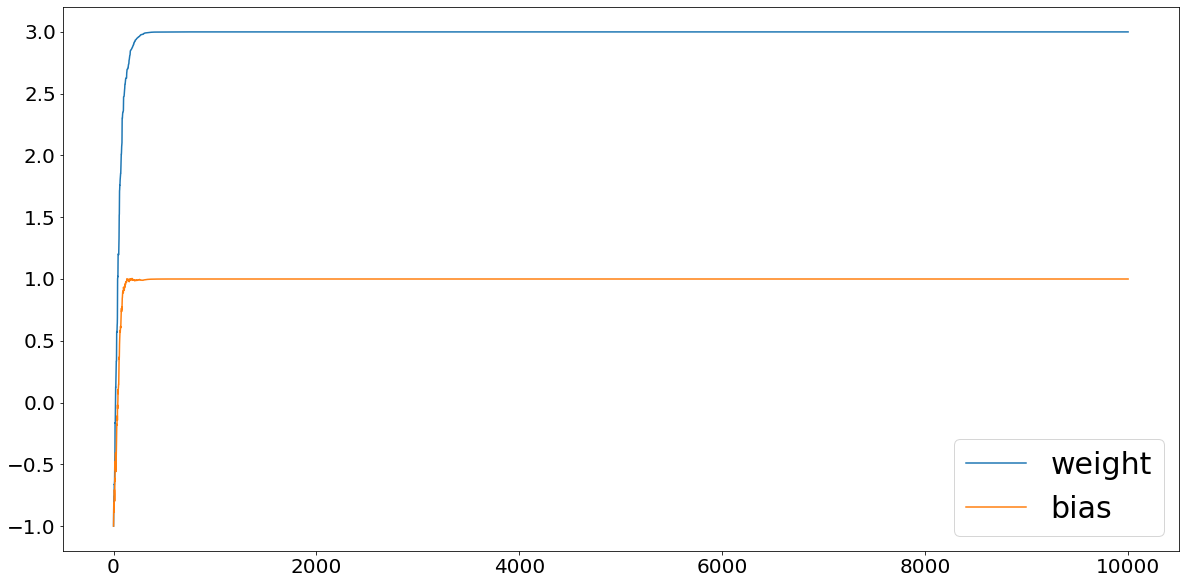

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.plot(w_trace, label='weight')
ax.plot(b_trace, label='bias')

ax.tick_params(labelsize=20)
ax.legend(fontsize=30)
ax.grid